In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [3]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/train/results.csv')
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/train/results.csv')
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/train/results.csv')
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/train/results.csv')

In [5]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

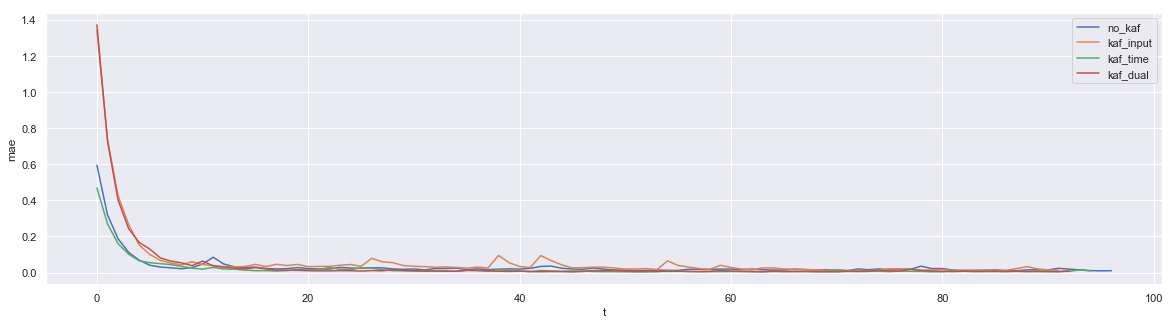

In [6]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

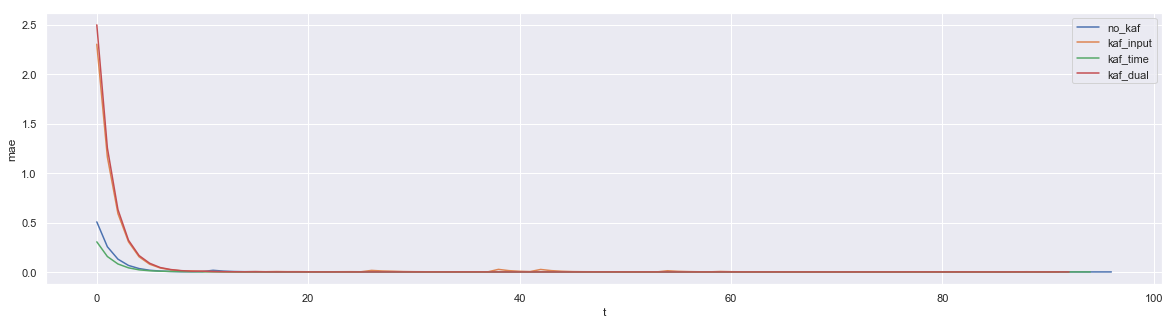

In [7]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [8]:

rows = ['no_kaf','kaf_input','kaf_time', 'kaf_dual']

In [11]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [12]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.026636,8.167129,0.006331,0.026636,0.048400,0.026636,19.591675
kaf_input,0.017020,7.233327,0.003680,0.017020,0.030229,0.017020,8.750162
kaf_time,0.047421,8.170174,0.028515,0.047421,0.076186,0.047421,51.790052
kaf_dual,0.029362,8.144852,0.027747,0.029362,0.042433,0.029362,9.945955


In [19]:
header = table.index.tolist()

In [20]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/test/results.csv', names=header)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/test/results.csv', names=header)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/test/results.csv', names=header)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/test/results.csv', names=header)

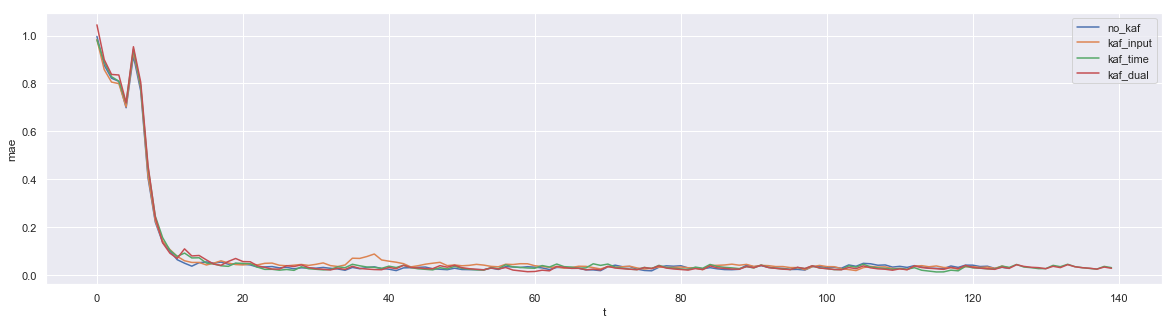

In [22]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [25]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [26]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.075816,6.400975,0.058476,0.075816,0.121466,0.075816,17.034115
kaf_input,0.073080,7.260985,0.062082,0.073080,0.106362,0.073080,14.159843
kaf_time,0.082627,7.128008,0.058311,0.082627,0.138406,0.082627,24.267912
kaf_dual,0.072792,7.914334,0.062709,0.072792,0.106972,0.072792,13.012846


In [30]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/report/89745_report.csv', index_col=0)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/report/89709_report.csv', index_col=0)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/report/89721_report.csv', index_col=0)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/report/89725_report.csv', index_col=0)

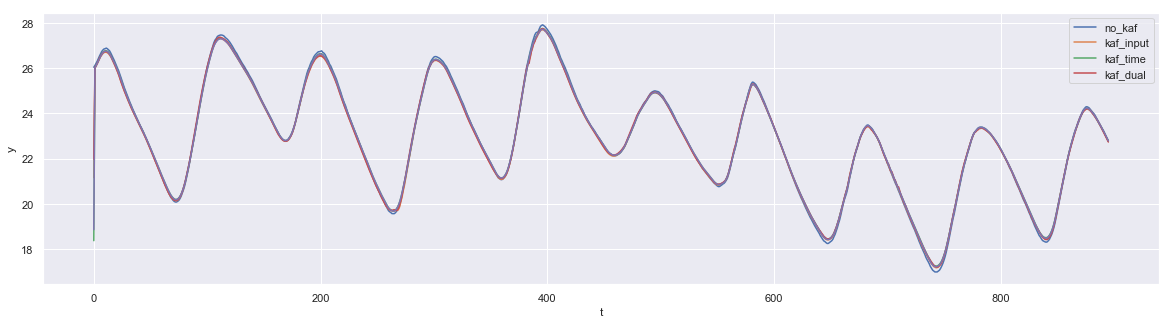

In [33]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [39]:
df = pd.concat([df_no_kaf.y, df_no_kaf.y_hat, df_kaf_input.y_hat, df_kaf_time.y_hat, df_kaf_dual.y_hat], axis=1)

In [41]:
df.columns = ['y', 'y_hat', 'input', 'time', 'dual']

In [42]:
df.head()

,y,y_hat,input,time,dual
dates,,,,,
2012-04-22,26.0480,21.158855,18.367449,21.980892,18.856260
2012-04-22,26.1253,25.993557,26.026052,26.040762,26.014969
2012-04-22,26.2200,26.093359,26.124130,26.119438,26.111210
2012-04-22,26.3147,26.190620,26.230083,26.223927,26.215767
2012-04-22,26.4333,26.304136,26.339527,26.332580,26.323950


In [46]:
np.abs((df.y - df.y_hat)).mean()

0.08730825000000005

In [47]:
np.abs((df.y - df.input)).mean()

0.08275028236607142

In [48]:
np.abs((df.y - df.time)).mean()

0.08559600223214292

In [49]:
np.abs((df.y - df.dual)).mean()

0.08057375558035705